In [13]:
import pandas as pd

# First Look + Data Cleansing

In [14]:
df_raw = pd.read_csv('data/credit-training-data.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)

Looking at the Data - We see that the columns are coded and the values are all numerical as indicated in the data description file

In [15]:
df_raw.describe()

,437,14,24,34,40,1287,64,75,4,92,...,121,37,143,152,2,173,1,192,201,1.1
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,...,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,502.633292,12.561952,20.997497,32.565707,46.409262,3271.745932,62.120150,73.386733,2.971214,92.690864,...,122.410513,35.441802,142.659574,151.923655,1.415519,172.918648,1.153942,191.414268,201.027534,1.296621
std,287.415973,1.260884,11.996866,1.078556,36.683281,2767.869647,1.589622,1.220902,1.120742,0.705015,...,1.050929,11.417847,0.718014,0.541907,0.588153,0.650537,0.361120,0.492904,0.163737,0.457054
min,0.000000,11.000000,4.000000,30.000000,40.000000,276.000000,61.000000,71.000000,1.000000,91.000000,...,121.000000,19.000000,141.000000,151.000000,1.000000,171.000000,1.000000,191.000000,201.000000,1.000000
25%,255.000000,11.000000,12.000000,32.000000,41.000000,1375.000000,61.000000,73.000000,2.000000,92.000000,...,121.000000,26.000000,143.000000,152.000000,1.000000,173.000000,1.000000,191.000000,201.000000,1.000000
50%,506.000000,12.000000,18.000000,32.000000,42.000000,2333.000000,61.000000,73.000000,3.000000,93.000000,...,123.000000,33.000000,143.000000,152.000000,1.000000,173.000000,1.000000,191.000000,201.000000,1.000000
75%,749.000000,14.000000,24.000000,34.000000,43.000000,3972.500000,63.000000,75.000000,4.000000,93.000000,...,123.000000,42.000000,143.000000,152.000000,2.000000,173.000000,1.000000,192.000000,201.000000,2.000000
max,999.000000,14.000000,72.000000,34.000000,410.000000,15945.000000,65.000000,75.000000,4.000000,94.000000,...,124.000000,75.000000,143.000000,153.000000,4.000000,174.000000,2.000000,192.000000,202.000000,2.000000


In [16]:
df = df_raw.copy()

So before we do any meaningful analysis, let's assign proper names to the columns first.

In [17]:
col_names = ['Credit Identifier', 'Money on checking account', 'Duration in month', 'Credit History', 'Purpose', 'Credit amount', 'Savings account/bonds',
            'Current employment since', 'Installment rate in percentage of disposable income', 'Personal status and sex', 'Other debtors / guarantors',
            'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 
             'Number of existing credits at this bank', 'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'Foreign worker', 
             'Result']

df.columns = col_names

In [18]:
df = df.drop(['Credit Identifier'], axis=1)

Also, the categorical values are numerically coded and inherently don't have a meaning, so let's map the codes to their actual categories.

In [19]:
moca = {11: "< 0", 12: "0 <= ... < 200", 13: "... >= 200", 14: "no checking account"}

ch = {30: "no credits taken/ all credits paid back duly", 31: "all credits at this bank paid back duly", 32: "existing credits paid back duly till now",
     33: "delay in paying off in the past", 34 : "other credits existing (not at this bank)"}

purp = {40 : "car (new)", 41 : "car (used)", 42 : "furniture/equipment", 43 : "radio/television", 44 : "domestic appliances", 45 : "repairs", 46 : "education", 47 : "vacation",
       48 : "retraining",  49 : "business", 410 : "others"}

sab = {61 : "... < 100 DM", 62 : "100 <= ... < 500", 63 : "500 <= ... < 1000", 64 : ".. >= 1000", 65 : "unknown"}

ces = {71 : "unemployed", 72 : "... < 1 year", 73 : "1 <= ... < 4 years", 4 : "4 <= ... < 7 years", 75 : ".. >= 7 years"}

pss = {91 : "male : divorced/separated", 92 : "female : divorced/separated/married", 93 : "male : single", 94 : "male : married/widowed", 
       95 : "female : single"}

odg = {101 : "none", 102 : "co-applicant", 103 : "guarantor"}

prop = {121 : "real estate", 122 : "if not 121 : building society savings / life insurance", 123 : "if not 121/122 : car or other, not in attribute 6",
       124 : "unknown / no property"}

oip = {141 : "bank", 142 : "stores", 143 : "none"}

hou = {151 : "rent", 152 : "own", 153 : "for free"}

job = { 171 : "unemployed/ unskilled - non-resident", 172 : "unskilled - resident", 173 : "skilled employee / official", 
      174 : "management / self-employed / highly qualified employee / officer"}

tel = {191 : "none", 192 : "yes, registered under the customers name"}

fw = {201 : "yes", 202 : "no" }

res = {1:1, 2:0}

df = df.replace({"Money on checking account": moca, "Credit History": ch, 'Purpose': purp, 'Savings account/bonds': sab, 'Current employment since': ces,
                'Personal status and sex': pss, 'Other debtors / guarantors': odg, 'Property': prop, 'Other installment plans': oip, 'Housing': hou, 
                 'Job': job, 'Telephone': tel, 'Foreign worker': fw, 'Result': res })

Let's us run some first analysis on the numerical features, what min/max and mean values are, find out about there standard deviations and percentiles.

What is noticeable right away is the very low amount of rows at 799, which we might have to consider when choosing certain model parameters, etc.

In [20]:
round(df.describe(), 2)

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Result
count,799.0,799.00,799.00,799.00,799.00,799.00,799.00,799.00
mean,21.0,3271.75,2.97,2.86,35.44,1.42,1.15,0.70
std,12.0,2767.87,1.12,1.09,11.42,0.59,0.36,0.46
min,4.0,276.00,1.00,1.00,19.00,1.00,1.00,0.00
25%,12.0,1375.00,2.00,2.00,26.00,1.00,1.00,0.00
50%,18.0,2333.00,3.00,3.00,33.00,1.00,1.00,1.00
75%,24.0,3972.50,4.00,4.00,42.00,2.00,1.00,1.00
max,72.0,15945.00,4.00,4.00,75.00,4.00,2.00,1.00


The categorical features look good as well.

In [21]:
df.head()

,Money on checking account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Current employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Result
0,< 0,6,other credits existing (not at this bank),furniture/equipment,1872,... < 100 DM,unemployed,4,male : single,none,...,unknown / no property,36,none,for free,3,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200,15,existing credits paid back duly till now,radio/television,1444,unknown,... < 1 year,4,male : single,none,...,if not 121 : building society savings / life i...,23,none,own,1,skilled employee / official,1,none,yes,1
2,< 0,18,other credits existing (not at this bank),car (new),5302,... < 100 DM,.. >= 7 years,2,male : single,none,...,unknown / no property,36,none,for free,3,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",yes,1
3,... >= 200,12,existing credits paid back duly till now,furniture/equipment,1474,... < 100 DM,... < 1 year,4,female : divorced/separated/married,none,...,if not 121 : building society savings / life i...,33,bank,own,1,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",yes,1
4,... >= 200,24,other credits existing (not at this bank),business,1275,.. >= 1000,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,36,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1


And no missing values, which is good as missing values would have probably required us to remove some more valuable data.

In [22]:
df.isna().sum()

Money on checking account                                   0
Duration in month                                           0
Credit History                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Current employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

# EDA

Let us look at the distribution of our numerical features. Some things to notice:
    
- The duration has spikes, which makes sense as most credits will have durations at 6 month intervalls, i.e. 6/12/18/24 etc.

- Credit Amount and Age are both positively skewed.

- Our Target Feature is also a bit imbalanced, but not too extremely, so reducing the imbalance is not necessary.

array([[<AxesSubplot:title={'center':'Duration in month'}>,
        <AxesSubplot:title={'center':'Credit amount'}>,
        <AxesSubplot:title={'center':'Installment rate in percentage of disposable income'}>],
       [<AxesSubplot:title={'center':'Present residence since'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Number of existing credits at this bank'}>],
       [<AxesSubplot:title={'center':'Number of people being liable to provide maintenance for'}>,
        <AxesSubplot:title={'center':'Result'}>, <AxesSubplot:>]],
      dtype=object)

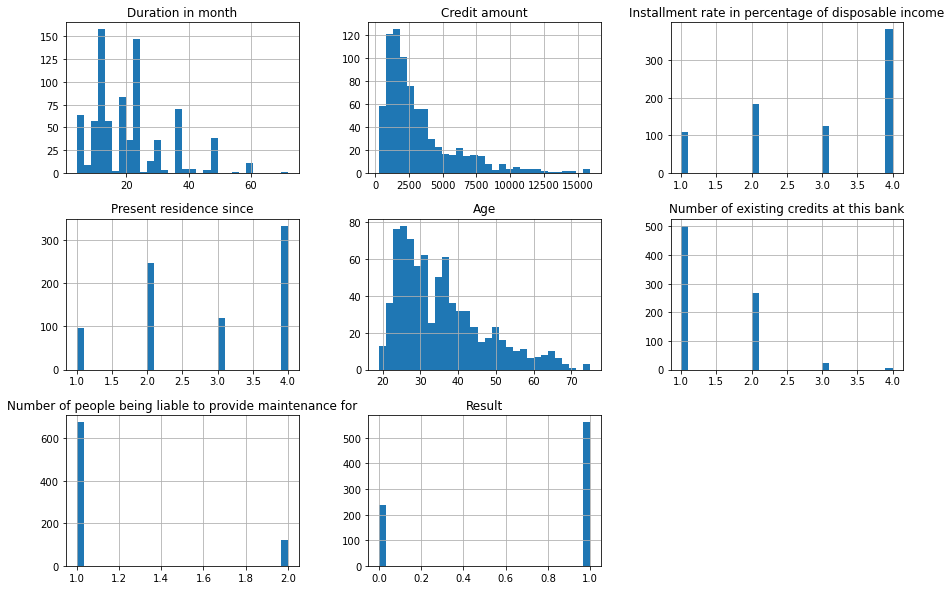

In [23]:
df.hist(bins=30, figsize=(15, 10))

# Train/Test Split

Next up, we split the data into a training and test set. 

First, I shuffle the data as I don't see how the original order is impactful in any way, so better to eliminate that factor, if you cannot account for its specific impact.

Because of the low number of rows, I decided for a 75/25 split and not the more usual 70/30 or 66/33 split, as we need sufficient data to train on. I also stratify the data to ensure a similar distribution of our target and credit amount feature in both train and test sets. The similar distribution of the credit amount will be important for later optimization.

NOTE: Stratify your data only if you can safely assume that new incoming data will similarly distributed.

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np
df = df.sample(frac=1) # shuffle data

bins = np.linspace(0, len(df['Credit amount'].unique()), 5)
cred_binned = np.digitize(df['Credit amount'], bins)
df['cred_binned'] = cred_binned



X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis=1), df['Result'], test_size=0.25, stratify=df[['Result', 'cred_binned']],
                                                    random_state=42)

X_train = X_train.drop('cred_binned', axis=1)
X_test = X_test.drop('cred_binned', axis=1)

It appears that our stratification was succesful.

In [25]:
print('test set credit mean:',round(X_test['Credit amount'].mean(), 3))
print('train set credit mean:',round( X_train['Credit amount'].mean(), 3))
print('test set result mean:',round( y_test.mean(),3))
print('train set result mean:',round( y_train.mean(),3))

test set credit mean: 3295.105
train set credit mean: 3263.947
test set result mean: 0.7
train set result mean: 0.705


# Preprocessing 

In [26]:
cat_cols = list(X_train.select_dtypes(include=[object]).columns) # Columns that will be processed by a category encoder
num_cols = list(X_train.select_dtypes(exclude=[object]).columns) # Columns that will be processed by a scaler

To encode categorical features we use a leave one out encoder.

Leave-one-out encoding (LOO or LOOE) is an example of target-based encoding—it prevents target data leakage, unlike other target-based methods. As its name suggests, the method consists of calculating the mean target of a given category k for observation j without using the corresponding target of j.

Source: https://heartbeat.fritz.ai/hands-on-with-feature-engineering-advanced-methods-in-python-for-machine-learning-e05bf12da06a

We fit the encoder on our training data only and apply the transformation of the test data based on this, so no 'cheating' occurs. 

The advantage of LOO encoding is that unlike target encoding, no data leakage occurs as just described. Also, unlike one hot or binary encoding, LOO Encoding  does not cause increase in dimensionality as the categorical values are directly replaced by numericals 1:1. One Hot encoding can become very computationally expensive and creates a lot of sparse data, noise depending on the data.

Since our target is a binary 0/1 feature, our categorical features will all be in a range between 0 and 1, too, as the mean of the target will take the categories place.

In [27]:
import category_encoders as ce
loo = ce.LeaveOneOutEncoder(cols=cat_cols, drop_invariant=False)
loo.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


LeaveOneOutEncoder(cols=['Money on checking account', 'Credit History',
                         'Purpose', 'Savings account/bonds',
                         'Current employment since', 'Personal status and sex',
                         'Other debtors / guarantors', 'Property',
                         'Other installment plans', 'Housing', 'Job',
                         'Telephone', 'Foreign worker'])

In [28]:
X_train = loo.transform(X_train)
X_test = loo.transform(X_test)

We use a 0/1 scaler to transform our numerical features into the same scale. Some algorithms have problems dealing with differently scaled data, while some like tree based models can handle it just fine.

In [29]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train[num_cols])

test_credit_amount = X_test['Credit amount'] # Create a series with the unscaled credit amount for late optimization

X_train[num_cols] = mms.transform(X_train[num_cols])
X_test[num_cols] = mms.transform(X_test[num_cols])

We then pickle our preprocessing models so that we can use them for later predictions when need to preprocess new raw input data

In [30]:
import pickle
pickle.dump(loo, open('pickled_models/cat_enc_loo.sav', 'wb'))
pickle.dump(mms, open('pickled_models/scaler_mms.sav', 'wb'))

# Postprocessing Analysis

Now that all data is numerical, let us see if some features are correlated. If the correlation is heavy enough, this can also cause problems for certain algorithms.

In [31]:
X_train.corr()

,Money on checking account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Current employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker
Money on checking account,1.000000,-0.036656,0.258049,0.159497,0.000552,0.235993,0.128118,-0.000742,0.043906,-0.033132,-0.031395,0.055250,0.121182,0.040214,0.138666,0.051655,0.011669,-0.041201,0.115291,-0.047326
Duration in month,-0.036656,1.000000,-0.138531,0.048618,0.630268,0.024401,0.018145,0.062336,0.124048,-0.057826,0.055015,-0.305706,-0.045596,-0.094214,-0.031905,-0.019070,0.055455,-0.000024,0.191810,-0.097829
Credit History,0.258049,-0.138531,1.000000,0.074357,-0.140557,0.043038,0.096587,0.040588,0.007364,-0.031905,-0.005471,0.089523,0.134238,0.195630,0.109423,0.226731,0.035244,0.037305,0.033256,0.019957
Purpose,0.159497,0.048618,0.074357,1.000000,0.023899,0.085681,0.050028,0.025493,0.039764,0.034061,-0.000938,0.027336,-0.019250,-0.009609,0.050836,-0.098046,0.043442,-0.025826,0.087756,-0.006782
Credit amount,0.000552,0.630268,-0.140557,0.023899,1.000000,0.029487,-0.007568,-0.298129,0.123997,-0.134493,0.031846,-0.291516,0.011634,-0.031093,-0.084703,0.013706,0.178194,-0.026964,0.269484,-0.052636
Savings account/bonds,0.235993,0.024401,0.043038,0.085681,0.029487,1.000000,0.144586,-0.008055,0.008105,-0.030041,0.090905,-0.050891,0.108435,0.017038,0.036463,-0.010136,-0.045951,-0.008871,0.065520,0.010496
Current employment since,0.128118,0.018145,0.096587,0.050028,-0.007568,0.144586,1.000000,0.070386,0.200260,0.050551,0.130896,0.018071,0.227944,0.005331,0.089600,0.079292,-0.022757,0.132499,0.064107,-0.018637
Installment rate in percentage of disposable income,-0.000742,0.062336,0.040588,0.025493,-0.298129,-0.008055,0.070386,1.000000,0.104394,0.048533,0.001715,-0.022744,0.051811,-0.087978,0.056912,0.028164,0.030721,-0.064496,0.025587,-0.043220
Personal status and sex,0.043906,0.124048,0.007364,0.039764,0.123997,0.008105,0.200260,0.104394,1.000000,-0.032736,0.019611,-0.125652,0.116018,-0.105478,0.052264,0.106136,0.058354,0.237479,0.075703,0.010099
Other debtors / guarantors,-0.033132,-0.057826,-0.031905,0.034061,-0.134493,-0.030041,0.050551,0.048533,-0.032736,1.000000,-0.016883,0.068432,0.006949,-0.003727,0.047953,-0.021451,-0.052034,0.052898,-0.027506,0.079279


As with this massive amount of numbers, you can easily miss something, so let's create a mask, that will flag every correlation bigger than 0.5/-0.5 with true.

But apart from Credit amount and duration, which have a correlation coefficient of roughly 0.6 (which is nothing to worry about), everything looks fine.

In [32]:
X_abs = X_train.corr().abs()
msk = (X_abs>.49) 
msk

,Money on checking account,Duration in month,Credit History,Purpose,Credit amount,Savings account/bonds,Current employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker
Money on checking account,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Duration in month,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Credit History,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Purpose,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Credit amount,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Savings account/bonds,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Current employment since,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Installment rate in percentage of disposable income,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Personal status and sex,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Other debtors / guarantors,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


# Algorithm Optimization

Let's move on to our algorithm and its optimization:

Since the cost of false positive, false negative and True positive have been clearly defined, I decided to create a calibrated classification which as an output has calibrated probabilities. We can then use these probabilities to find out the threshold at which the profit is maximized. Accordingly for such a task we will try to optimize the brier score metric and not accuracy or logloss like we would usually in classification tasks.

Read a bit about the brier score and calibrated models for better understanding:
https://neptune.ai/blog/brier-score-and-model-calibration

in a nutshell, whereas an uncalibrated model will weigh certain features very heavily and thus push the underlying classification probabilities to the extremes (basically creating a S-shaped curve) to create a vertical decision boundary, a calibrated classifier does exactly the opposite, trying to keep the probabilities as linear as possible with respect to the actual fractions of positive cases.

As far as the algorithm choice, XGBoost has kind of become everybody's darling, because it is a powerful, non-parametric ensemble algorithm, that performs well out of the box and can deal with a variety of different data. We will later test it against a logistic regression model.

In [33]:
import numpy as np
params_xgb = {"n_estimators": [10,20,50,100],
              "max_depth": list(range(1, 11)),
              "learning_rate": [1e-3, 1e-2, 1e-1, 0.5, 1.],
              "subsample": list(np.arange(0.05, 1.01, 0.05)),
              "min_child_weight": list(range(1, 21)),
              "colsample_bytree": list(np.arange(0.1,1,0.1)),
              "reg_lambda": [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
              "reg_alpha": [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
}

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, brier_score_loss
xgb = XGBClassifier(eval_metric=brier_score_loss, obj='binary:logistic', verbosity=0, use_label_encoder=False)
bri = make_scorer(brier_score_loss, greater_is_better=False, needs_proba=True)

We use RepeatedStratifiedKFold to ensure that each fold has the same distribution of the target.

To reduce the noise in the estimated model performance we try to keep the k-value relatively high, although with our small data set, we cannot go too high. This will reduce the bias in the model’s estimated performance, although it will increase the variance: e.g. tie the result more to the specific dataset used in the evaluation.

An alternate approach is to repeat the k-fold cross-validation process multiple times and report the mean performance across all folds and all repeats (2 in this case). This approach is generally referred to as repeated k-fold cross-validation.

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

rscv = RandomizedSearchCV(xgb, 
                         param_distributions = params_xgb,
                         cv = rskf,  
                         n_iter = 100,
                         scoring = bri, 
                         error_score = 0, 
                         verbose = 1, 
                         n_jobs = -1)

In [36]:
rscv.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   40.8s finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=0),
                   error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric=<function brier_score_loss at 0x7f9808e45dc0>,
                                           gamma=None, gpu_id=None,
                                           importance_type='gain',
                                           interaction_constraints=None,
                                           l...
                                                       0.5, 1.0, 5.0, 10.0,
                                                       15.0, 20.0, 25.0],
                                        'subsample': [0.05, 0.1,
                                

# Preliminary Model Evaluation

Here the average Brier score of our best performing model:

In [37]:
print("Brier CV score xgb:", round(rscv.best_score_*-1, 3))

Brier CV score xgb: 0.17


Our model has been optimized on the brier score, so even uncalibrated, it should not perform too badly. Still, let us see what it can do vs. 2 calibrated versions of it (Isotonic and Sigmoid) as well as against a logistic regression, which is inherently calibrated out of the box. We will then compute the brier score as well as some other relevant metric like precision, recall and ROC AUC to decide which model we will go forward with.

In [38]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, roc_auc_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    
    rep = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=rep, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=rep, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        pickle.dump(clf, open('pickled_models/'+name+'.sav', 'wb'))
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y_test.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tROC AUC: %1.3f" % roc_auc_score(y_test, y_pred))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=7)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=7, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()


The results are very interesting! Here is a breakdown which Algorithm has 'won' in which metric:

Brier Score: XGBoost

ROC AUC: XGBoost + Isotonic

Precision: XGBoost + Isotonic

Recall: Logistic Regression

F1 Score: Logistic Regression


Looking at the calibration, confirms the findings of the scores as the calibration curve of XGBoost is most aligned with the perfectly calibrated line, so we will pick it as our winner.

Logistic:
	Brier: 0.159
	ROC AUC: 0.624
	Precision: 0.758
	Recall: 0.964
	F1: 0.849

XGBoost:
	Brier: 0.156
	ROC AUC: 0.618
	Precision: 0.757
	Recall: 0.936
	F1: 0.837

XGBoost + Isotonic:
	Brier: 0.159
	ROC AUC: 0.657
	Precision: 0.780
	Recall: 0.914
	F1: 0.842

XGBoost + Sigmoid:
	Brier: 0.162
	ROC AUC: 0.636
	Precision: 0.768
	Recall: 0.921
	F1: 0.838



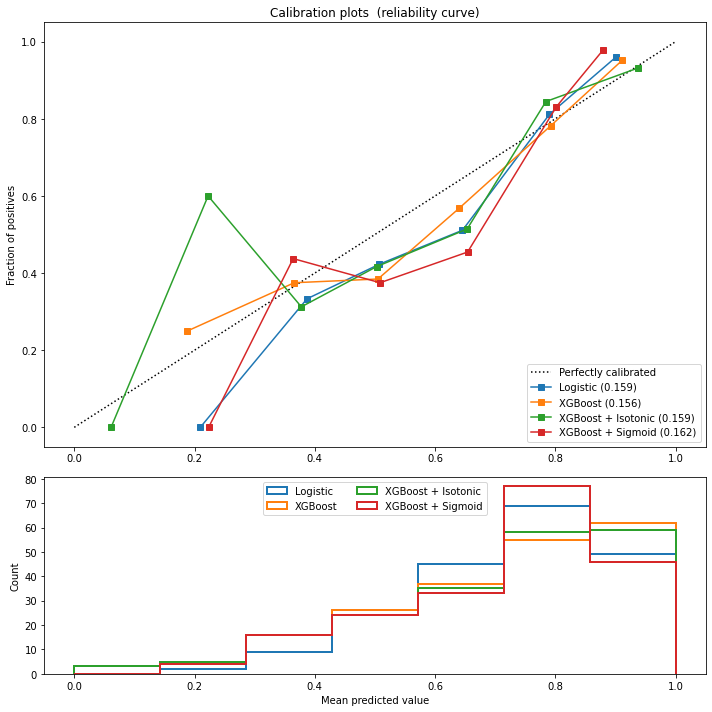

In [53]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    plot_calibration_curve(rscv.best_estimator_, 'XGBoost', 1)

We then create a variable of our winning model and start our prediction.

In [54]:
xg_cal = pickle.load(open('pickled_models/XGBoost.sav', 'rb')) # Let's create a variable of our winning model

# Prediction

In [55]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    y_pred = xg_cal.predict_proba(X_test)[:,1]

Next, we create a new dataframe consisting of the tests set credit amount, the result and the predicted probabilites

In [56]:
df_test = pd.concat([test_credit_amount, y_test], axis=1)
df_test['proba'] = np.round(y_pred*100)

In [57]:
df_test.head()

,Credit amount,Result,proba
578,6560,0,35.0
142,5117,1,64.0
645,433,0,51.0
754,931,0,58.0
24,1469,1,74.0


# Profit Optimization

As far as training our model we are done! But the question remains at which probability threshold is the profit of our model optimized. For this purpose I will calculate the losses and gains as described in the task (False Positive = 90% loss of credit sum, False Negative = 5% loss of credit sum, True Positive = 30% gain of credit sum, True Negative = 0% of credit sum)

In [58]:
fp_loss = []
tp_gain = []
fn_loss = []

for idx, row in df_test.iterrows():
    if row[1] == 0:
        fp_loss.append(row[0]*-.9)
                       
    else:
        fp_loss.append(0)      
        
    if row[1] == 1:
        tp_gain.append(row[0]*.3)
        fn_loss.append(row[0]*-.05)
        
    else:
        tp_gain.append(0)
        fn_loss.append(0)

df_test['fp_loss'] = fp_loss
df_test['tp_gain'] = tp_gain
df_test['fn_loss'] = fn_loss

This is then calculated for each entry in the test set and appended to the dataframe.

In [59]:
df_test.head()

,Credit amount,Result,proba,fp_loss,tp_gain,fn_loss
578,6560,0,35.0,-5904.0,0.0,0.00
142,5117,1,64.0,0.0,1535.1,-255.85
645,433,0,51.0,-389.7,0.0,0.00
754,931,0,58.0,-837.9,0.0,0.00
24,1469,1,74.0,0.0,440.7,-73.45


Now, we iterate over a range of values between 0 and 100 representing the probability thresholds and for each discrete probability then calculate the sum of losses and gains to see at which probability threshold this sum is maximized.

In [60]:
proflist = []
problist = []
for prob in range(0,101):
    net_prof = []
    for idx, row in df_test.iterrows():
        if row[2] >= prob and row[1] == 1:
            net_prof.append(row[4])
        elif row[2] >= prob and row[1] == 0:
            net_prof.append(row[3])
        elif row[2] < prob and row[1] == 1:
            net_prof.append(row[5])
        elif row[2] < prob and row[1] == 0:
            net_prof.append(0)
    proflist.append(round(sum(net_prof),1))
    problist.append(prob)
    #print(prob, round(sum(net_prof),1))

    
probdict = dict(zip(problist, proflist))    

Let us plot the optimization Curve. We see that the peak profit is achieved somewhere between 70 and 90% as the threshold. This also means that as long as we are within this spectrum our model should yield acceptable results. 

Please bear in mind that this was done with a very low amount of data, which can affect the robustness of a model

Text(0.5, 1.0, 'Profit Optimiation Curve')

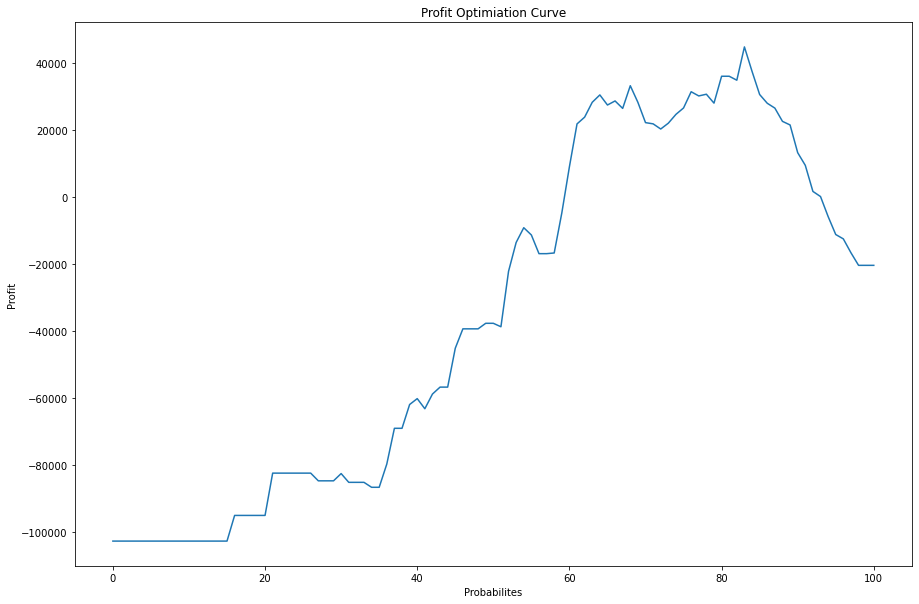

In [61]:
plt.figure(figsize=(15, 10))
plt.plot(problist, proflist)  
plt.xlabel('Probabilites')
plt.ylabel('Profit')
plt.title('Profit Optimiation Curve')

And indeed the highest profit was achieved at 83% probability. Meaning that for future predictions, every prediction at 83% or above will be labeled good and the others will be labeled bad.

In [62]:
print (max(probdict, key=probdict.get), probdict[max(probdict, key=probdict.get)])

83 44766.6


# Full Model Training + Pickling

As the last step, we bring together train and test data and train the model on the entire data. In this case this is very important as we only have 800 rows of data.

In [49]:
X = X_train.append(X_test)
y = y_train.append(y_test)

In [63]:
xg_cal.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              eval_metric=<function brier_score_loss at 0x7f9808e45dc0>,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=13, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, obj='binary:logistic', random_state=0,
              reg_alpha=0.0001, reg_lambda=10.0, scale_pos_weight=1,
              subsample=0.7000000000000001, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)

# Feature Importance

Let's take a look at feature importance.

'Money on checking account' looks like it is by far the most important feature.

Text(0.5, 0, 'Income Classification Feature Importance')

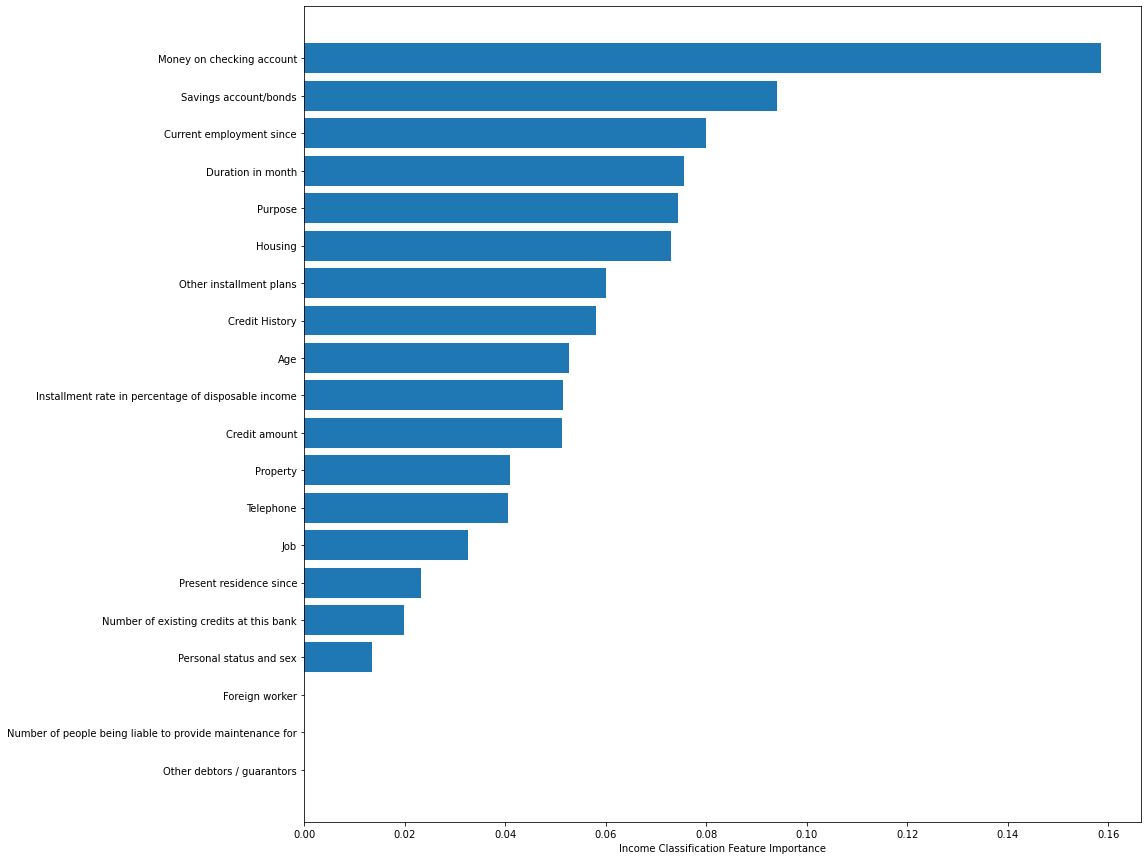

In [64]:
xg_base = xg_iso.base_estimator
fi = xg_base.feature_importances_
sorted_idx = fi.argsort()
plt.figure( figsize=(15, 15))
plt.barh(X_train.columns[sorted_idx], xg_base.feature_importances_[sorted_idx])
plt.xlabel("Income Classification Feature Importance")

let's pickle the fully trained model, which will be used in the main.py script to perform prediction on the credit input data.

In [65]:
pickle.dump(xg_cal, open('pickled_models/xg_cal_fully_fit.sav', 'wb'))